### **California House**

[Sumber data California House](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Disclaimer: Data ini berisi informasi dari sensus California tahun 1990. Jadi, meskipun hal ini mungkin tidak membantu Anda dalam memprediksi harga rumah saat ini (2023), hal ini memberikan kumpulan data pengenalan yang dapat diakses untuk mengajari orang-orang tentang dasar-dasar pembelajaran machine learning.

Pasar properti, seperti di California, memberikan peluang menarik bagi para data analis untuk menganalisis dan memprediksi arah pergerakan harga properti. Prediksi harga properti menjadi semakin penting dan bermanfaat. Harga properti adalah indikator yang baik baik dari kondisi pasar secara keseluruhan maupun kesehatan ekonomi suatu negara. Dengan mempertimbangkan data yang disediakan, kita sedang mengelola kumpulan besar catatan penjualan properti yang tersimpan dalam format yang tidak diketahui dan dengan masalah kualitas data yang tidak diketahui.

**Problem Statement**

Dalam menghadapi dinamika pasar properti, khususnya di California, tantangan utama yang dihadapi adalah bagaimana memanfaatkan dataset sensus California tahun 1990 untuk mengembangkan model prediksi harga properti. Meskipun data ini tidak mencerminkan kondisi pasar saat ini (2023), pengembangan model prediksi memiliki potensi untuk memberikan wawasan berharga terkait faktor-faktor yang memengaruhi harga properti dan trennya.

Tujuan utama adalah **membangun model machine learning yang dapat memprediksi harga properti berdasarkan karakteristik tertentu, seperti lokasi geografis, umur rumah, jumlah kamar, pendapatan median, dan variabel lainnya yang terdapat dalam dataset**. Model ini diharapkan dapat memberikan pemahaman yang lebih dalam tentang faktor-faktor apa yang memiliki dampak signifikan terhadap harga properti.

**Goals**

Berdasarkan problem statement di atas, hasil dari model ini diharapkan dapat **memberikan wawasan strategis kepada para pemangku kepentingan di pasar properti, membantu pengambilan keputusan investasi, dan meningkatkan pemahaman tentang tren pasar properti di California**.

**Analytic Approach**

Agar dapat memperkirakan nilai pasar sebuah properti di California, informasi-informasi berikut ini diperlukan:

1. Karakteristik Kawasan dan Lingkungan:

- Jumlah Populasi (Population)
- Jumlah Rumah Tangga (Households)
- Usia Median Perumahan (Housing Median Age)
- Pendapatan Median (Median Income)

2. Kondisi Fisik Rumah:

- Koordinat Bujur (Longitude)
- Koordinat Lintang (Latitude)
- Proksimitas dengan Laut (Ocean Proximity)
- Total Ruangan (Total Rooms)
- Total Kamar Tidur (Total Bedrooms)

**Modelling**

Berikut teknik permodelan yang akan digunakan dalam analisis ini:
1. Linear Regression
2. Decission Tree Regressor
3. KNN Regressor
4. Random Forest
5. XGBoost Regressor

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah sbb:
1. RMSE : nilai rataan akar kuadrat dari error
2. MAE  : rataan nilai absolut dari error
3. MAPE : rataan persentase error yang dihasilkan oleh model regresi, di mana RMSE adalah nilai rataan akar kuadrat dari error 

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga properti sesuai dengan limitasi fitur yang digunakan. 

### **Data Understanding**

- Data tersebut berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa ringkasan statistik berdasarkan data sensus tahun 1990.
- Kolom-kolomnya adalah sebagai berikut:

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Koordinat bujur (longitude)  |
| latitude | Float | Koordinat lintang (latitude) |
| Housing median age | Float | Median usia rumah dalam suatu blok |
| total_rooms | Float | Jumlah kamar dalam suatu blok |
| total_bedrooms | Float | Jumlah kamar tidur dalam suatu blok   |
| population | Float | Jumlah populasi dalam suatu blok  |
| households | Float | Jumlah keluarga/grup (yang tinggal di rumah) untuk satu blok |
| median_income | Float | Median pendapatan sebuat keluarga/grup di dalam blok (dalam satuan sepuluh ribu US Dollars) |
| median_house_value | Float | Median nilai rumah dalam suatu blok (dalam satuan US Dollars) |
| ocean_proximity | Object | Seberapa dekat suatu wilayah dengan garis pantai |

<br>

In [4]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [5]:
# Load Dataset
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


#### **Exploratory Data Analysis**

In [6]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


C:\Users\William\AppData\Local\Temp\ipykernel_11292\3779084530.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'])


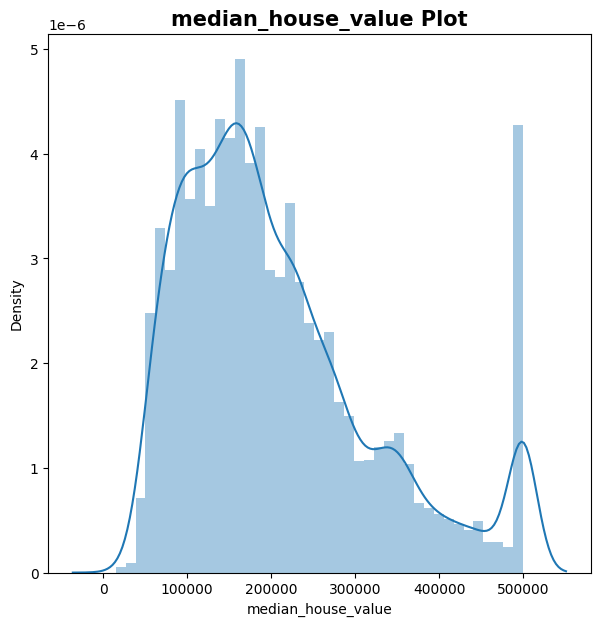

In [7]:
# Plot distribusi fitur 'median_house_value'
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('median_house_value Plot', size=15, weight='bold');

Dari plot distribusi median_house_value di atas, dapat dilihat bahwa polanya adalah right skewed (positive skew).

**Correlation**

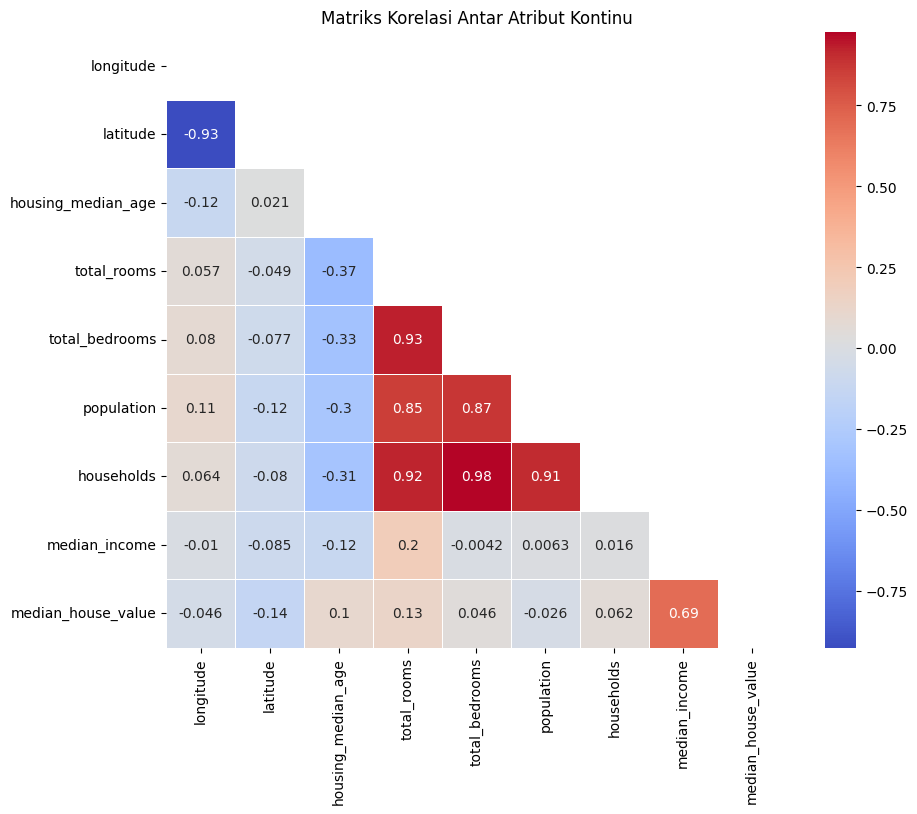

In [8]:
# Cek korelasi antar atribut kontinu dengan plot matriks menggunakan heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=.5,
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Matriks Korelasi Antar Atribut Kontinu')
plt.show()

**Insight**

- total_rooms
    - korelasi kuat dengan: total_bedrooms, populaiton, & households
- total_bedrooms
    - korelasi kuat dengan: population & households
- population
    - korelasi kuat dengan: households
- median_income
    - korelasi kuat dengan: median_house_value


Korelasi yang signifikan antara kolom-kolom seperti total_rooms, total_bedrooms, population, dan households dapat dijelaskan oleh hubungan antara total_rooms, total_bedrooms, dan population di suatu wilayah. Semakin banyak households maka total_rooms dan total_bedrooms juga meningkat. Sebaliknya, dengan tingginya population juga mencerminkan kebutuhan untuk total_rooms dan total_bedrooms yang lebih besar.

Selain itu, korelasi yang kuat antara 'median_income' dan 'median_house_value' menunjukkan adanya hubungan antara tingkat penghasilan dan nilai rumah. Hal ini mungkin mencerminkan kecenderungan penduduk untuk memilih tinggal di lingkungan yang sesuai dengan penghasilan mereka.

housing_median_age, total_rooms, dan total_bedrooms memiliki korelasi yang rendah terhadap median_house_value. Umur rumah, jumlah ruangan, dan jumlah kamar tidur tidak berbanding lurus dengan harga rumah.

**Berdasarkan Kedekatan dengan Laut**

In [9]:
# cek data types object
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

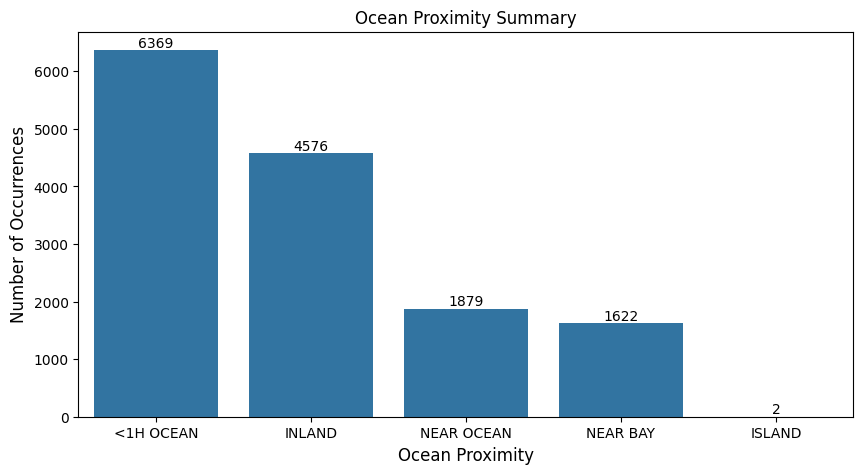

In [10]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['ocean_proximity'].value_counts().index, y=df['ocean_proximity'].value_counts())
ax.bar_label(ax.containers[0],fmt='%.0f')
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

**Insight**

- <1H OCEAN (Kurang dari 1 Jam ke Laut)
    - Terdapat 6369 baris data yang berlokasi cukup dekat dengan laut, mungkin dalam jarak kurang dari satu jam perjalanan.
- INLAND (Daratan)
    - Ada 4576 baris data yang terletak di daratan, yang mungkin berarti mereka jauh dari pantai.
- NEAR OCEAN (Dekat Laut)
    - Terdapat 1879 baris data yang berlokasi cukup dekat dengan laut, menunjukkan kedekatan dengan pantai.
- NEAR BAY (Dekat Teluk)
    - Sebanyak 1622 baris data berada dalam jarak yang dekat dengan teluk, menunjukkan lokasi yang mungkin berada dekat dengan teluk atau sejenisnya.
- ISLAND (Pulau):
    - Hanya terdapat 2 baris data yang terletak di pulau, mungkin merupakan wilayah terpencil atau pulau kecil.

**Lokasi Perumahan Berdasarkan Populasi dan Median House Value**

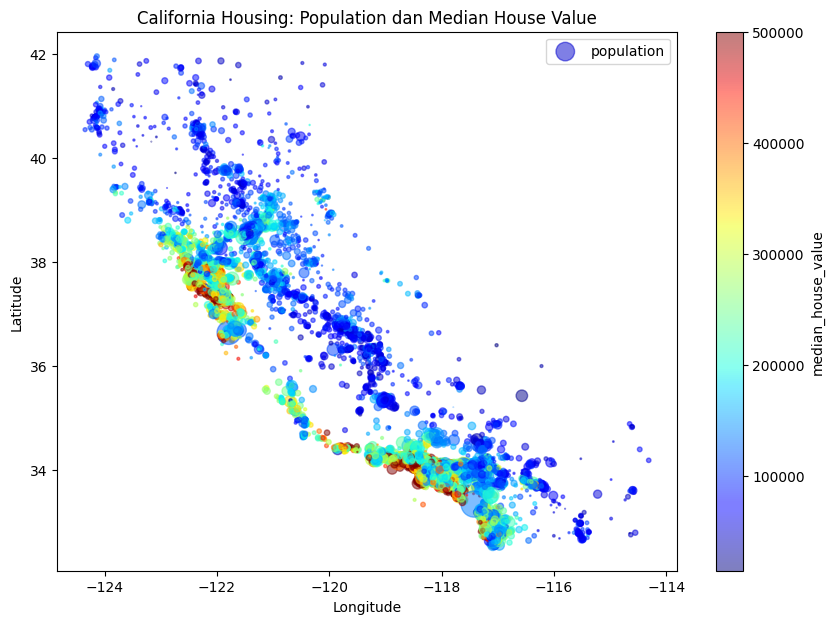

In [11]:
df.plot(kind='scatter', 
        x='longitude', 
        y='latitude', 
        alpha=0.5,
        s=df['population']/100, 
        label='population', 
        figsize=(10,7),
        c='median_house_value', 
        cmap='jet', 
        colorbar=True
)
plt.legend()

plt.legend()
plt.title("California Housing: Population dan Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='best')
plt.show()

**Insight**

Berikut merupakan penjelasan mengenai grafik di atas:
1. Persebaran titik-titik merupakan lokasi rumah berdasarkan longitude dan latitude
2. Tiap warna menandakan nilai dari median_house_value
3. Radius ukuran titik mewakili jumlah populasi di daerah tersebut

Dapat dilihat bahwa harga rumah di California yang lokasinya dekat pantai memiliki harga yang lebih tinggi dibandingkan dengan rumah di lokasi lain.

**Plot Kolom Numerik**

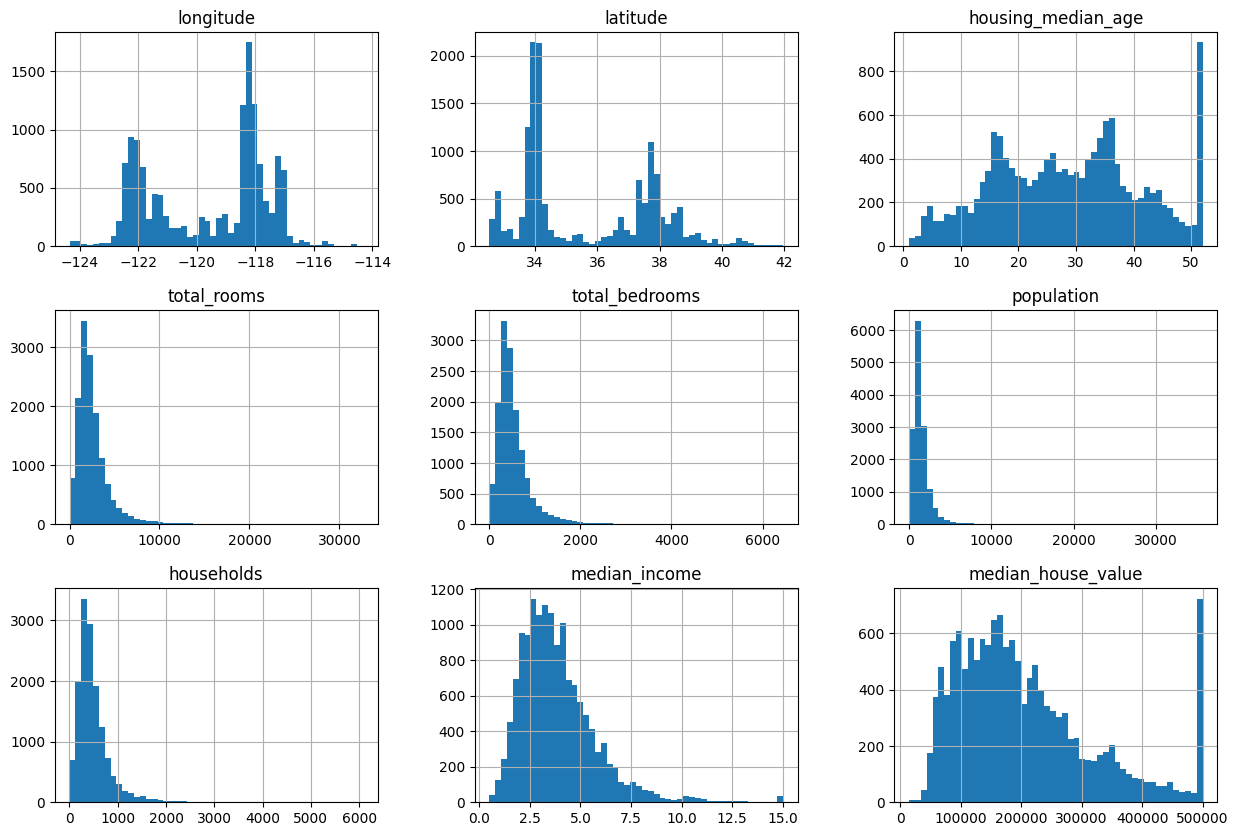

In [12]:
df.hist(figsize=(15,10), bins=50);

**Insight**

- longitude & latitude
    - Data terdistribusi paling banyak di sekitar longitude -118, sedangkan untuk latitudenya terdistribusi paling banyak di 34. Setelah dicek, ternyata lokasi ini merupakan Hacienda Heights di daerah Los Angeles, California, United States of America.
- housing_median_age
    - housing_median_age dari rentang 0 sampai di bawah 52 memiliki jumlah dari rentang 0 sampai di bawah 600. Namun mengalami kenaikan signifikan di housing_median_age 52 dengan jumlah sebesar 896. Hal ini merupakan indikator bahwa ada banyak blok perumahan yang dibangun pada tahun tersebut.
- total_rooms, total_bedrooms, population, households, median_income, median_house_value
    - Untuk keenam grafik ini memiliki data yang terdistribusi tidak normal dan right skewed (positive skew)
- median_house_value
    - Pada grafik ini dapat dilihat bahwa puncaknya ada di median_house_value 500000, berati ada 672 rumah yang harganya ada di atas $500.000.

### **Data Preprocessing**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [14]:
pd.set_option('display.max_colwidth', None)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.

#### **Missing Value**

In [15]:
# Mencari tahu total NaN (Missing Value) di tiap kolom
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [16]:
df[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [17]:
# Hapus baris yang memiliki missing value
df = df.dropna().reset_index()
df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...,...
14306,14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14307,14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14308,14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14309,14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


**Buat Kolom Baru avg_rooms_per_house & avg_bedrooms_per_house**

Dikarenakan terdapat kolom median_house_value maka dibuat 2 kolom baru untuk mencari tahu rata-rata jumlah ruangan dan rata-rata jumlah kamar tidur per rumahnya. Dari sini dibuat asumsi bahwa 1 household menempati 1 rumah. Berikut perhitungan untuk mendapatkan avg_rooms_per_house & avg_bedrooms_per_house:
1. avg_rooms_per_house: total_rooms / households
2. avg_bedrooms_per_house: total_bedrooms / households

In [18]:
df['avg_rooms_per_house'] = round(df['total_rooms'] / df['households'])
df['avg_bedrooms_per_house'] = round(df['total_bedrooms'] / df['households'])
df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
0,0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,3.0,1.0
1,1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,4.0,1.0
2,2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0
3,3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.0,1.0
4,4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14306,14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,5.0,1.0
14307,14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.0,1.0
14308,14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.0,1.0
14309,14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,5.0,1.0


#### **Cek Duplikat**

In [19]:
# Cek kembali datasetnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14311 entries, 0 to 14310
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   14311 non-null  int64  
 1   longitude               14311 non-null  float64
 2   latitude                14311 non-null  float64
 3   housing_median_age      14311 non-null  float64
 4   total_rooms             14311 non-null  float64
 5   total_bedrooms          14311 non-null  float64
 6   population              14311 non-null  float64
 7   households              14311 non-null  float64
 8   median_income           14311 non-null  float64
 9   ocean_proximity         14311 non-null  object 
 10  median_house_value      14311 non-null  float64
 11  avg_rooms_per_house     14311 non-null  float64
 12  avg_bedrooms_per_house  14311 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.4+ MB


In [20]:
# Memeriksa duplikat
df.duplicated().sum()

0

#### **Cek Outliers**

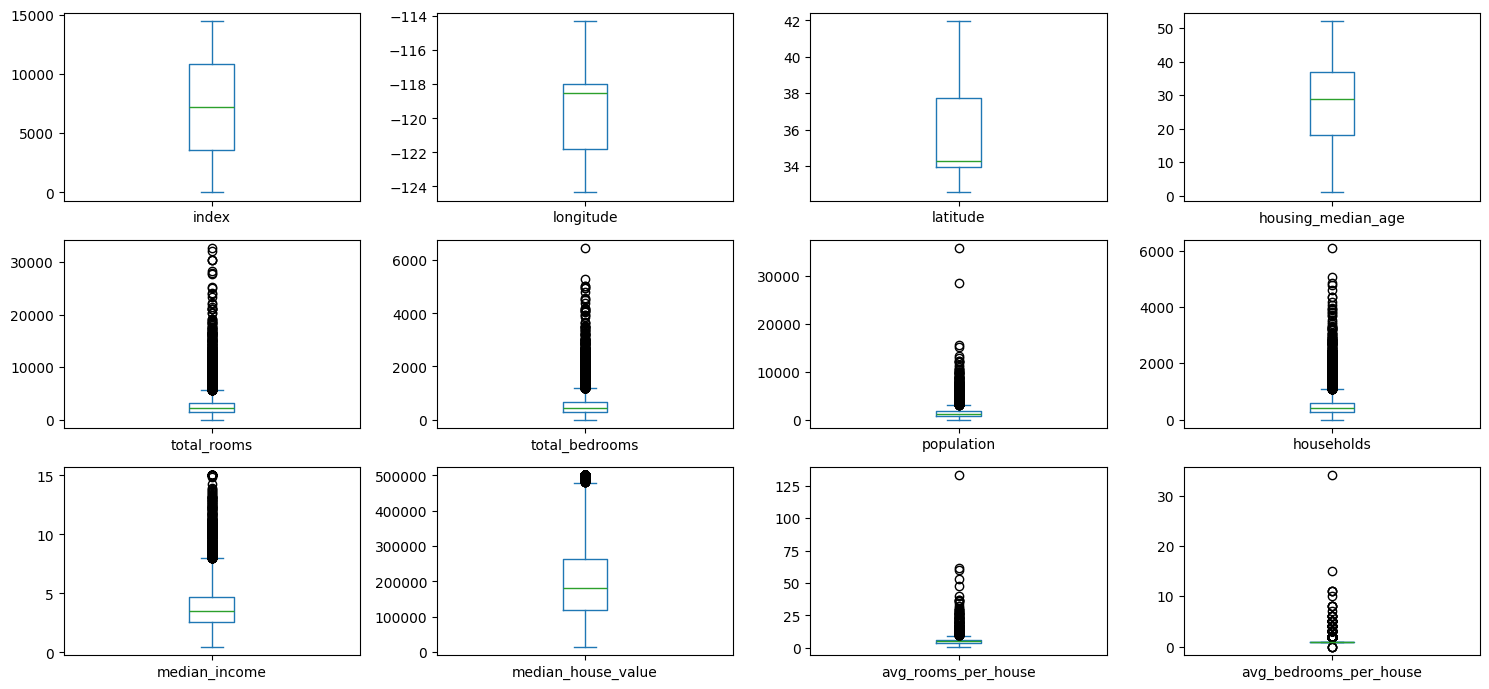

In [21]:
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,7))
plt.tight_layout()
plt.show()

In [22]:
numerical_features = df.drop(columns=['median_house_value']).describe().columns
numerical_features

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'avg_rooms_per_house', 'avg_bedrooms_per_house'],
      dtype='object')

In [23]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = df[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,index,-7224.50000,21663.50000,0,14311,0,0.00
1,longitude,-127.50000,-112.30000,0,14311,0,0.00
2,latitude,28.25250,43.39250,0,14311,0,0.00
3,housing_median_age,-10.50000,65.50000,0,14311,0,0.00
4,total_rooms,-1083.00000,5677.00000,0,13406,905,6.32
5,total_bedrooms,-233.00000,1175.00000,0,13432,879,6.14
6,population,-623.00000,3129.00000,0,13489,822,5.74
7,households,-207.75000,1090.25000,0,13475,836,5.84
8,median_income,-0.68065,7.98615,0,13834,477,3.33
9,avg_rooms_per_house,1.00000,9.00000,0,14122,189,1.32


##### **total_rooms**

In [24]:
Q1_total_rooms = df['total_rooms'].quantile(0.25)
Q3_total_rooms = df['total_rooms'].quantile(0.75)
IQR_total_rooms = Q3_total_rooms - Q1_total_rooms

In [25]:
Q3_total_rooms

3142.0

In [26]:
upper_bound_total_rooms = Q3_total_rooms + 1.5 * IQR_total_rooms
upper_bound_total_rooms

5677.0

In [27]:
# Cek jumlah data di atas upper bound
df[df['total_rooms'] > upper_bound_total_rooms]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
5,5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.0,1.0
9,9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0,7.0,1.0
13,13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0,6.0,1.0
22,22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0,5.0,1.0
45,45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,14405,-121.90,36.93,22.0,7281.0,1233.0,1849.0,832.0,5.3276,NEAR OCEAN,335500.0,9.0,1.0
14270,14406,-122.25,37.46,33.0,6841.0,950.0,2681.0,980.0,7.1088,NEAR OCEAN,443300.0,7.0,1.0
14277,14413,-122.28,37.49,25.0,7335.0,1157.0,2626.0,1049.0,6.5475,NEAR OCEAN,500001.0,7.0,1.0
14281,14417,-117.05,33.05,6.0,7916.0,1293.0,2741.0,1204.0,5.6436,<1H OCEAN,278600.0,7.0,1.0


In [28]:
# total_rows_before = df.shape[0]
# df = df.drop(df[df['total_rooms'] > upper_bound_total_rooms].index)
# total_rows_after = df.shape[0]
# jumlah_baris_terhapus = total_rows_before - total_rows_after
# print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

##### **total_bedrooms**

In [29]:
Q1_total_bedrooms = df['total_bedrooms'].quantile(0.25)
Q3_total_bedrooms = df['total_bedrooms'].quantile(0.75)
IQR_total_bedrooms = Q3_total_bedrooms - Q1_total_bedrooms

In [30]:
upper_bound_total_bedrooms = Q3_total_bedrooms + 1.5 * IQR_total_bedrooms
upper_bound_total_bedrooms

1175.0

In [31]:
df[df['total_bedrooms'] > upper_bound_total_bedrooms]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
3,3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.0,1.0
5,5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.0,1.0
9,9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0,7.0,1.0
10,10,-121.94,37.28,18.0,4356.0,1334.0,1968.0,1245.0,3.6294,<1H OCEAN,240000.0,3.0,1.0
13,13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,14343,-118.09,34.57,4.0,9761.0,1683.0,4970.0,1535.0,4.5266,INLAND,142900.0,6.0,1.0
14226,14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0,4.0,1.0
14262,14398,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,<1H OCEAN,193300.0,4.0,1.0
14269,14405,-121.90,36.93,22.0,7281.0,1233.0,1849.0,832.0,5.3276,NEAR OCEAN,335500.0,9.0,1.0


In [32]:
# total_rows_before = df.shape[0]
# df = df.drop(df[df['total_bedrooms'] > upper_bound_total_bedrooms].index)
# total_rows_after = df.shape[0]
# jumlah_baris_terhapus = total_rows_before - total_rows_after
# print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

##### **population**

In [33]:
Q1_population = df['population'].quantile(0.25)
Q3_population = df['population'].quantile(0.75)
IQR_population = Q3_population - Q1_population

In [34]:
upper_bound_population = Q3_population + 1.5 * IQR_population
upper_bound_population

3129.0

In [35]:
df[df['population'] > upper_bound_population]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
5,5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.0,1.0
9,9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0,7.0,1.0
13,13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0,6.0,1.0
45,45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0,7.0,1.0
54,54,-121.36,38.67,5.0,5819.0,1507.0,3237.0,1356.0,2.2339,INLAND,116600.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,14337,-118.41,33.97,44.0,2789.0,503.0,3732.0,474.0,4.6176,<1H OCEAN,352300.0,6.0,1.0
14207,14343,-118.09,34.57,4.0,9761.0,1683.0,4970.0,1535.0,4.5266,INLAND,142900.0,6.0,1.0
14208,14344,-118.03,34.06,24.0,2343.0,834.0,3537.0,824.0,2.1094,<1H OCEAN,135200.0,3.0,1.0
14226,14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0,4.0,1.0


##### **households**

In [36]:
Q1_households = df['households'].quantile(0.25)
Q3_households = df['households'].quantile(0.75)
IQR_households = Q3_households - Q1_households

In [37]:
upper_bound_households = Q3_households + 1.5 * IQR_households
upper_bound_households

1090.25

In [38]:
df[df['households'] > upper_bound_households]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
5,5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.0,1.0
9,9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0,7.0,1.0
10,10,-121.94,37.28,18.0,4356.0,1334.0,1968.0,1245.0,3.6294,<1H OCEAN,240000.0,3.0,1.0
13,13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0,6.0,1.0
22,22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14190,14326,-118.34,33.91,12.0,9975.0,3638.0,7429.0,3405.0,2.6689,<1H OCEAN,192300.0,3.0,1.0
14207,14343,-118.09,34.57,4.0,9761.0,1683.0,4970.0,1535.0,4.5266,INLAND,142900.0,6.0,1.0
14226,14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0,4.0,1.0
14262,14398,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,<1H OCEAN,193300.0,4.0,1.0


##### **median_income**

In [39]:
Q1_median_income = df['median_income'].quantile(0.25)
Q3_median_income = df['median_income'].quantile(0.75)
IQR_median_income = Q3_median_income - Q1_median_income

In [40]:
upper_bound_median_income = Q3_median_income + 1.5 * IQR_median_income
upper_bound_median_income

7.986150000000001

In [41]:
df[df['median_income'] > upper_bound_median_income]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
6,6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0,8.0,1.0
8,8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502,<1H OCEAN,500001.0,9.0,1.0
43,43,-122.21,37.37,34.0,1476.0,217.0,613.0,223.0,8.2883,NEAR OCEAN,500001.0,7.0,1.0
73,73,-121.99,37.26,17.0,4034.0,611.0,1158.0,560.0,8.2069,<1H OCEAN,442500.0,7.0,1.0
122,124,-121.89,37.23,20.0,7754.0,976.0,3094.0,941.0,8.1900,<1H OCEAN,361600.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,14298,-118.54,34.26,23.0,4960.0,592.0,1929.0,586.0,10.9052,<1H OCEAN,500001.0,8.0,1.0
14171,14306,-118.18,34.16,34.0,5012.0,746.0,1699.0,715.0,9.4987,<1H OCEAN,500001.0,7.0,1.0
14178,14314,-118.01,33.69,3.0,945.0,115.0,337.0,123.0,11.5199,<1H OCEAN,500001.0,8.0,1.0
14210,14346,-117.66,34.12,22.0,2272.0,278.0,933.0,305.0,8.8204,INLAND,390500.0,7.0,1.0


##### **avg_rooms_per_house**

In [42]:
Q1_avg_rooms_per_house = df['avg_rooms_per_house'].quantile(0.25)
Q3_avg_rooms_per_house = df['avg_rooms_per_house'].quantile(0.75)
IQR_avg_rooms_per_house = Q3_avg_rooms_per_house - Q1_avg_rooms_per_house

In [43]:
upper_bound_avg_rooms_per_house = Q3_avg_rooms_per_house + 1.5 * IQR_avg_rooms_per_house
upper_bound_avg_rooms_per_house

9.0

In [44]:
df[df['avg_rooms_per_house'] > upper_bound_avg_rooms_per_house]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
96,97,-117.22,34.26,16.0,8020.0,1432.0,1749.0,540.0,4.9716,INLAND,162500.0,15.0,3.0
163,165,-117.13,34.17,17.0,1181.0,271.0,248.0,114.0,5.5762,INLAND,150000.0,10.0,2.0
166,168,-120.19,39.35,7.0,2611.0,395.0,482.0,159.0,5.0622,INLAND,174100.0,16.0,2.0
209,211,-116.39,33.69,10.0,11659.0,2007.0,2186.0,1083.0,6.9833,INLAND,238800.0,11.0,2.0
344,348,-120.04,38.86,16.0,2708.0,481.0,712.0,261.0,3.7891,INLAND,117700.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14085,14220,-117.82,33.81,19.0,2556.0,304.0,822.0,260.0,9.9055,<1H OCEAN,456900.0,10.0,1.0
14153,14288,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,INLAND,437500.0,62.0,11.0
14248,14384,-116.40,33.78,8.0,3059.0,500.0,612.0,208.0,6.8729,INLAND,259200.0,15.0,2.0
14268,14404,-120.06,39.25,21.0,2459.0,525.0,584.0,233.0,3.0100,INLAND,163500.0,11.0,2.0


##### **avg_bedrooms_per_house**

In [45]:
Q1_avg_bedrooms_per_house = df['avg_bedrooms_per_house'].quantile(0.25)
Q3_avg_bedrooms_per_house = df['avg_bedrooms_per_house'].quantile(0.75)
IQR_avg_bedrooms_per_house = Q3_avg_bedrooms_per_house - Q1_avg_bedrooms_per_house

In [46]:
upper_bound_avg_bedrooms_per_house = Q3_avg_bedrooms_per_house + 1.5 * IQR_avg_bedrooms_per_house
upper_bound_avg_bedrooms_per_house

1.0

In [47]:
df[df['avg_bedrooms_per_house'] > upper_bound_avg_bedrooms_per_house]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
15,15,-115.99,33.40,15.0,1945.0,536.0,515.0,273.0,2.0109,INLAND,54300.0,7.0,2.0
47,47,-118.02,33.65,38.0,2548.0,646.0,755.0,399.0,2.8352,NEAR OCEAN,408300.0,6.0,2.0
70,70,-124.00,40.22,16.0,2088.0,535.0,816.0,326.0,1.3190,<1H OCEAN,70700.0,6.0,2.0
96,97,-117.22,34.26,16.0,8020.0,1432.0,1749.0,540.0,4.9716,INLAND,162500.0,15.0,3.0
163,165,-117.13,34.17,17.0,1181.0,271.0,248.0,114.0,5.5762,INLAND,150000.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,14290,-118.97,37.64,13.0,1907.0,544.0,575.0,234.0,3.0685,INLAND,162500.0,8.0,2.0
14219,14355,-120.73,39.63,17.0,1791.0,356.0,432.0,190.0,3.8826,INLAND,92400.0,9.0,2.0
14248,14384,-116.40,33.78,8.0,3059.0,500.0,612.0,208.0,6.8729,INLAND,259200.0,15.0,2.0
14268,14404,-120.06,39.25,21.0,2459.0,525.0,584.0,233.0,3.0100,INLAND,163500.0,11.0,2.0


#### **Hapus Outliers**

In [48]:
# Hapus outliers total_rooms
total_rows_before = df.shape[0]
df = df.drop(df[df['total_rooms'] > upper_bound_total_rooms].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 905


In [49]:
# Hapus outliers total_bedrooms
total_rows_before = df.shape[0]
df = df.drop(df[df['total_bedrooms'] > upper_bound_total_bedrooms].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 198


In [50]:
# Hapus outliers population
total_rows_before = df.shape[0]
df = df.drop(df[df['population'] > upper_bound_population].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 172


In [51]:
# Hapus outliers households
total_rows_before = df.shape[0]
df = df.drop(df[df['households'] > upper_bound_households].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 5


In [52]:
# Hapus outliers median_income
total_rows_before = df.shape[0]
df = df.drop(df[df['median_income'] > upper_bound_median_income].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 415


In [53]:
# Hapus outliers avg_rooms_per_house
total_rows_before = df.shape[0]
df = df.drop(df[df['avg_rooms_per_house'] > upper_bound_avg_rooms_per_house].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 131


In [54]:
# Hapus outliers avg_bedrooms_per_house
total_rows_before = df.shape[0]
df = df.drop(df[df['avg_bedrooms_per_house'] > upper_bound_avg_bedrooms_per_house].index)
total_rows_after = df.shape[0]
jumlah_baris_terhapus = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {jumlah_baris_terhapus}")

Jumlah baris yang dihapus: 171


In [55]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5428
INLAND        3850
NEAR OCEAN    1609
NEAR BAY      1425
ISLAND           2
Name: count, dtype: int64

In [56]:
# Hapus baris dengan data 'ocean proximity' == ISLAND
df = df.drop(df[df['ocean_proximity'] == 'ISLAND'].index)
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5428
INLAND        3850
NEAR OCEAN    1609
NEAR BAY      1425
Name: count, dtype: int64

#### **Clean Dataset**

In [57]:
# Cek dataset yang sudah bersih
df.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
0,0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,3.0,1.0
1,1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,4.0,1.0
2,2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0
4,4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0
7,7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0,7.0,1.0


In [58]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12312 entries, 0 to 14310
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   12312 non-null  int64  
 1   longitude               12312 non-null  float64
 2   latitude                12312 non-null  float64
 3   housing_median_age      12312 non-null  float64
 4   total_rooms             12312 non-null  float64
 5   total_bedrooms          12312 non-null  float64
 6   population              12312 non-null  float64
 7   households              12312 non-null  float64
 8   median_income           12312 non-null  float64
 9   ocean_proximity         12312 non-null  object 
 10  median_house_value      12312 non-null  float64
 11  avg_rooms_per_house     12312 non-null  float64
 12  avg_bedrooms_per_house  12312 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ MB


Dari 14448 baris data, sekarang tersisa 12312 baris data yang akan digunakan untuk permodelan.Sebesar 14.7% data sudah dieliminasi setelah mengecek missing value dan outliers.

### **Modeling**

In [59]:
# Membuat duplikasi dataframe
df_model = df.copy()
df_model.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_per_house,avg_bedrooms_per_house
0,0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,3.0,1.0
1,1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,4.0,1.0
2,2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0
4,4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0
7,7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0,7.0,1.0


In [60]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [61]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity']),
], remainder='passthrough')

**Data Splitting**

In [62]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

In [63]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

**Choose a Benchmark Model**

In [64]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-64190.57585202 -68538.28231217 -62810.07065207 -64791.08831452
 -66739.82912637] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-43764.32778537 -46747.6134828  -43519.88646043 -45023.18131723
 -45762.03504319] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24031158 -0.24999584 -0.25219321 -0.24492014 -0.24163924] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-65108.91230771 -67579.47187461 -63623.41228803 -66518.10390047
 -66231.15066191] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-44421.41487038 -46300.03309789 -42286.96015353 -44310.74858474
 -44975.0414636 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


[-0.2374159  -0.24178714 -0.23698436 -0.237587   -0.23080837] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-68723.50524115 -76567.59038391 -71588.45128645 -71563.96036121
 -72563.69440283] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-44362.47766497 -49548.31472081 -45570.2319797  -46303.64619289
 -46363.11274759] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-0.23810332 -0.27509649 -0.26287187 -0.25731955 -0.24198326] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-51405.758511   -54992.73762901 -51844.28830442 -52402.68519752
 -52400.96961509] TransformedTargetRegressor(func=<ufunc 

In [65]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-65413.969251,2009.188717,-44963.408818,1212.131594,-0.245812,0.004619
1,KNN Regressor,-65812.210207,1347.774097,-44458.839634,1295.905070,-0.236917,0.003514
2,DecisionTree Regressor,-72201.440335,2532.692759,-46429.556661,1718.032279,-0.255075,0.013610
3,RandomForest Regressor,-52609.287851,1249.049332,-33593.893806,1173.621953,-0.178464,0.006040
4,XGBoost Regressor,-50090.414781,1067.522103,-32364.518054,576.224700,-0.174822,0.003738


1. RMSE
    - RandomForest Regressor & XGBoost Regressor memiliki nilai RMSE yang lebih kecil dibandingkan dengan model lain. Menunjukkan bahwa RandomForest Regressor dan XGBoost Regressor lebih baik dalam meminimalkan kesalahan prediksi.

2. MAE
    - RandomForest Regressor & XGBoost Regressor memiliki nilai MAE yang rendah. Ini menunjukkan bahwa model ini cenderung memberikan prediksi yang lebih dekat dengan nilai sebenarnya secara rata-rata dibandingkan dengan model lainnya.

3. MAPE
    - RandomForest Regressor dan XGBoost Regressor memiliki nilai MAPE yang lebih rendah, menunjukkan bahwa model-model ini memberikan prediksi dengan kesalahan persentase yang lebih rendah dibandingkan dengan model lainnya.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model RandomForest dan XGBoost

In [66]:
# Benchmark 2 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=1),
    'XGBoost': XGBRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,49558.877232,33877.500313,0.195653
XGBoost,47365.243258,31977.584951,0.185662


- Saat melakukan prediksi pada test set, secara keseluruhan, XGBoost menunjukkan performa yang sedikit lebih unggul. Hal ini dapat diamati dari fakta bahwa nilai RMSE dan MAE pada model XGBoost sedikit lebih rendah dibandingkan dengan model RandomForest. Selain itu, nilai MAPE yang rendah menunjukkan bahwa keduanya secara keseluruhan baik dalam memprediksi harga rumah, dengan kesalahan relatif kurang dari 20%.

**Hyperparameter Tuning**

Karena kinerja model XGBoost sedikit lebih baik dibandingkan dengan RandomForest, langkah selanjutnya adalah melakukan hyperparameter tuning pada model XGBoost. Tujuan dari tuning ini adalah untuk meningkatkan kinerja model secara keseluruhan.

In [67]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [68]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', 
    random_state = 1  
)

# Hanya bisa memilih salah stau metric untuk optimisasi

In [69]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [70]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE, & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.331860,0.225513,0.021219,0.002138,0.9,0.059948,119,8,0.05,5,...,914.401237,1,-0.175008,-0.185927,-0.187675,-0.183322,-0.181483,-0.182683,0.004386,1
20,0.315906,0.071809,0.013520,0.002943,0.9,0.007743,143,4,0.38,6,...,908.200110,2,-0.182510,-0.200671,-0.204280,-0.202527,-0.191823,-0.196362,0.008146,2
17,0.540746,0.018491,0.017028,0.001675,0.6,0.001,190,5,0.04,9,...,798.495055,3,-0.191811,-0.196553,-0.201185,-0.197150,-0.196593,-0.196658,0.002975,3
8,0.682065,0.127562,0.023326,0.003408,0.7,0.021544,182,6,0.31,2,...,1019.723944,4,-0.198027,-0.208993,-0.205263,-0.204981,-0.198888,-0.203231,0.004155,4
3,1.172095,0.200424,0.030036,0.008750,0.5,0.021544,166,8,0.1,9,...,638.309002,5,-0.197058,-0.209023,-0.215474,-0.204111,-0.201545,-0.205442,0.006336,5


In [71]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -48187.28219231841
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [72]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,45829.996569,31194.317953,0.178752


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [73]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,47365.243258,31977.584951,0.185662


In [74]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,45829.996569,31194.317953,0.178752


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

Sebelum & Sesudah Hyperparameter Tuning
- RMSE  : 47365.243258 --> 45829.996569	
- MAE   : 31977.584951 --> 31194.317953
- MAPE  : 0.185662     --> 0.178752

<Axes: title={'center': 'Actual vs. Prediction median_house_value'}, xlabel='median_house_value', ylabel='Predicted median_house_value'>

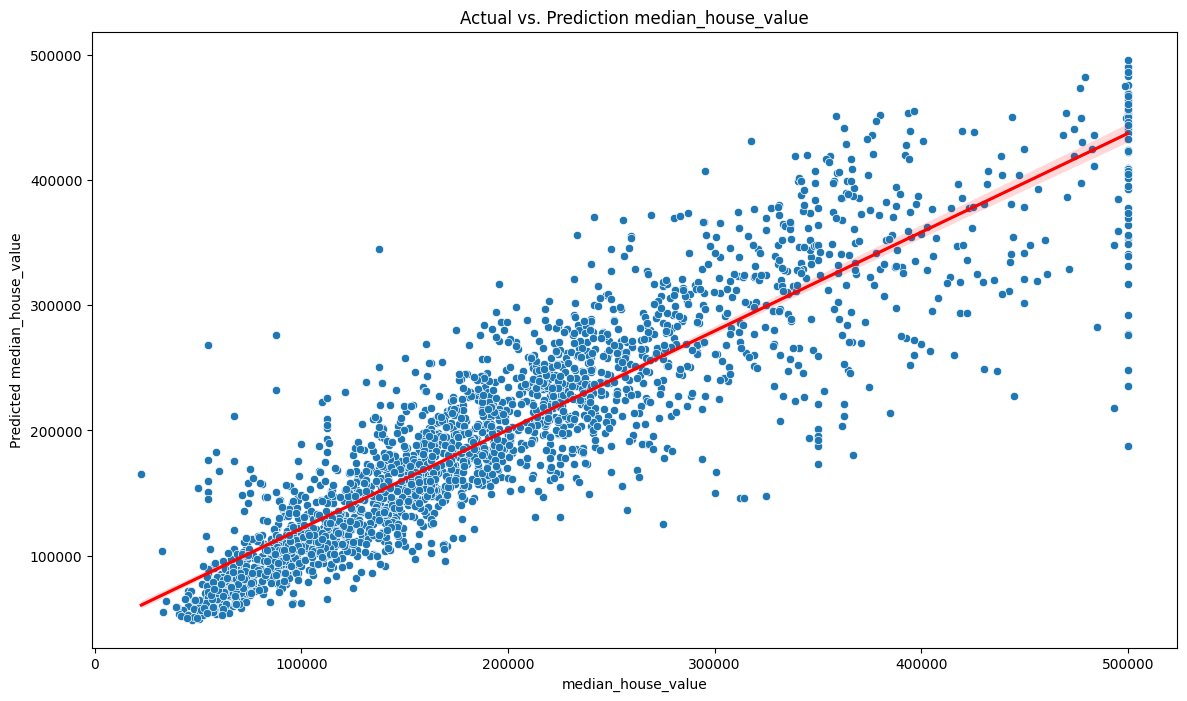

In [75]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction median_house_value', 
                                               xlabel='Actual median_house_value', 
                                               ylabel='Predicted median_house_value');
sns.regplot(x=y_test, y=y_pred_xgb_tuning, scatter=False, color='red')


Berikut yang dapat dilihat dari grafik di atas:
- Secara keseluruhan, grafik ini menunjukkan bahwa model prediksi dapat memberikan perkiraan yang cukup akurat tentang nilai rumah median
- Grafik ini menunjukkan bahwa nilai rumah median diprediksi akan terus meningkat di masa depan.
- Grafik ini menunjukkan bahwa ada perbedaan yang signifikan antara nilai rumah median aktual dan nilai rumah median yang diprediksi di daerah-daerah tertentu (Over Prediction & Under Prediction)

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

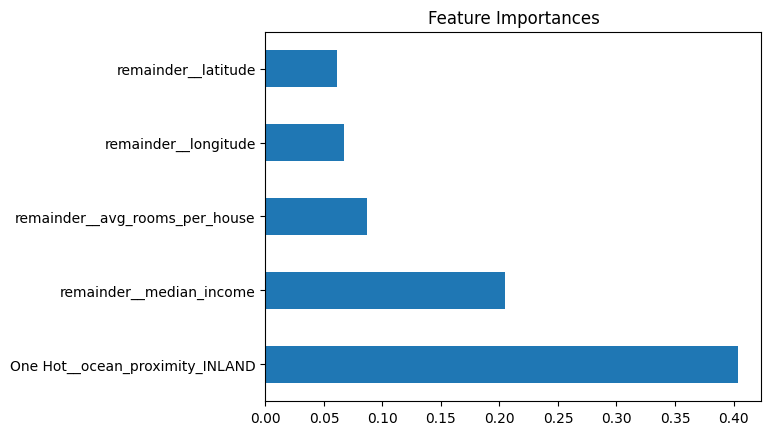

In [76]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Dari grafik di atas dapat dilihat bahwa lokasi rumah dalam wilayah yang tidak berbatasan langsung dengan laut (`INLAND`) memiliki nilai feature importance yang paling tinggi hampir mendektai 0.4 dan diikuti oleh `median income` dengan skor 0.21. Kemudian diikuti dengan `rata-rata kamar per rumahnya` dan lokasi geografis rumah berdasarkan `longitude dan latitude`.

### **Conclusion**

Berikut adalah beberapa hal yang dapat disimpulkan:
1. Dari 5 model yang diuji, XGBoost merupakan algoritma permodelan yang paling baik dalam memprediksi nilai rumah dari dataset *data_california_house.csv*'
2. Fitur yang paling berpengaruh dalam menentukan prediksi harga rumah adalah posisinya dari laut (`ocean_proximity`) dan rata-rata pendapatan rumah tangga (`median_income`) dalam suatu blok.
3. Meskipun model yang dibangun sudah cukup baik dalam melakukan prediksi harga rumah di California dengan rentang nilai yang dilatih terhadap permodelan (masksimal harga rumah di $500.001), namun masih diperlukan optimalisasi lebih lanjut karena prediksinya masih dapat meleset ±$30.000 atau >17% nilai aktualnya.

### **Recomendation**

1. Melakukan evaluasi fitur serta menambahkan fitur yang relevan dan memiliki pengaruh yang cukup kuat terhadap harga rumah.
2. Dari grafik Actual vs. Prediction median_house_value, perusahaan dapat mempertimbangkan kemungkinan Over Prediction dan Under Prediction pada prediksi:
    - Under Prediction perlu mendapatkan perhatian serius dalam perhitungan pendapatan, terutama jika perusahaan menggunakan prediksi ini untuk mengevaluasi potensi pendapatan dari penjualan rumah. Kekurangan pendapatan dapat terjadi karena harga sebenarnya cenderung lebih tinggi daripada prediksi model, dan hal ini dapat memiliki dampak yang signifikan pada perencanaan keuangan perusahaan.
    - Di sisi lain, Over Prediction memerlukan perhatian khusus saat menetapkan harga rumah. Jika perusahaan mengantisipasi harga rumah yang lebih tinggi dari nilai sebenarnya, ini dapat mengakibatkan situasi di mana biaya aktual rumah melebihi perkiraan. Hal ini mungkin menyulitkan perusahaan untuk menarik pembeli karena harga yang lebih mahal dari yang diharapkan. Oleh karena itu, perusahaan perlu berhati-hati dalam menyesuaikan harga untuk menghindari over prediction yang dapat berdampak negatif pada penjualan dan reputasi perusahaan.
3. Menambah kompleksitas model dapat dilakukan dengan dua pendekatan: 
    1. Penambahan parameter saat proses tuning untuk meningkatkan fleksibilitas model
    2. Menggunakan algoritma yang lebih canggih yang memiliki kemampuan untuk menangani pola yang lebih kompleks dalam data.

****

#### **Save Model**

In [77]:
# # Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Capstone_3_California_House_Prediction_XGB.sav', 'wb'))

In [79]:
# # Load model
# filename = 'Model_Capstone_3_California_House_Prediction_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))